In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# load csv to pandas dataframe
df_A = pd.read_csv('table_A_conversions.csv')
df_A.head()

,Conv_Date,Revenue,User_ID,Conv_ID
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c
1,2017-03-02,98.00004,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,2017-03-02,180.35300,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83
3,2017-03-23,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1
4,2017-03-03,197.47008,NaN,966568c7c859480c79b212520d20a51e735fd735


In [3]:
# load csv to pandas dataframe
df_B = pd.read_csv('table_B_attribution.csv')
df_B.head()

,Channel,IHC_Conv,Conv_ID
0,H,1.000000,881152bb20f9b73daafb99d77714f38ac702629c
1,I,0.300250,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,A,0.322839,faf5c1181ea84a32237dff45ca201d2c28f19d7b
3,E,0.376911,faf5c1181ea84a32237dff45ca201d2c28f19d7b
4,H,1.000000,b0e58a88459ece1b585ca22c93e633dc56273b83


In [4]:
df_A['Conv_Date'] =  pd.to_datetime(df_A['Conv_Date'])

In [5]:
class cohort_retention_analysis:
    def cohort(df, col_date, col_id):
        # Get year and month from col_date column and Create ConvPeriod column
        df['ConvPeriod'] = df[col_date].map(lambda x: 100*x.year + x.month)
        # setting index
        df.set_index(col_id, inplace=True)
        # Groupby col_id, apply min col_date to get year and month from earliest date and Create CohortGroup column
        df['CohortGroup'] = df.groupby(level=0)[col_date].min().apply(lambda x: x.strftime('%Y-%m'))
        # resetting index
        df.reset_index(inplace=True)
        # dropping null values
        df.dropna()
        # groupby multiindex and aggregate the unique col_ids per CohortGroup and ConvPeriod
        cohorts = df.groupby(['CohortGroup', 'ConvPeriod']).agg({col_id: pd.Series.nunique})
        # apply cohort_period() on cohorts based level 0(CohortGroup and ConvPeriod)
        cohorts = cohorts.groupby(level=0).apply(cohort_retention_analysis.cohort_period)
        # resetting index
        cohorts.reset_index(inplace=True)
        # setting index
        cohorts.set_index(['CohortGroup','CohortPeriod'], inplace=True)
        # create a pandas Series consist of each each cohort groups along with its size. Require for normalization to show change over time in percentage.
        cohort_group_size = cohorts[col_id].groupby(level=0).first()
        # Unstack cohort and normalize
        user_retention = cohorts[col_id].unstack(0).divide(cohort_group_size, axis=1)
        return user_retention  
    def cohort_period(df):
        '''
        Creates a `CohortPeriod` column per CohortGroup
        '''
        df['CohortPeriod'] = np.arange(len(df)) + 1
        return df
    
    def cohort_draw(df):
        sns.set(style='white')
        plt.figure(figsize=(12, 8))
        plt.title('User Retention')
        sns.heatmap(df.T, annot=True, fmt='.0%',cmap = 'BuGn')
        plt.show()


In [6]:
a = cohort_retention_analysis.cohort(df_A, 'Conv_Date', 'User_ID')
a.head(20)

CohortGroup,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.235387,0.078860,0.058621,0.047970,0.030557,0.043388,0.029210,0.031011,0.015658,0.018874,0.021945,0.020413,NaN
3,0.143210,0.081751,0.068652,0.036110,0.032035,0.035419,0.032529,0.013708,0.011405,0.019503,0.016209,NaN,NaN
4,0.127923,0.093174,0.050470,0.040063,0.028832,0.032172,0.017482,0.013258,0.010052,0.013212,NaN,NaN,NaN
5,0.121403,0.055464,0.068339,0.040327,0.033760,0.015348,0.020580,0.011910,0.012565,NaN,NaN,NaN,NaN
6,0.088354,0.099229,0.065204,0.043490,0.015278,0.017414,0.016154,0.014157,NaN,NaN,NaN,NaN,NaN
7,0.116232,0.107074,0.058934,0.021613,0.020946,0.017119,0.013720,NaN,NaN,NaN,NaN,NaN,NaN
8,0.105441,0.086843,0.042320,0.025303,0.015771,0.015643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.111511,0.045968,0.031661,0.023458,0.017250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


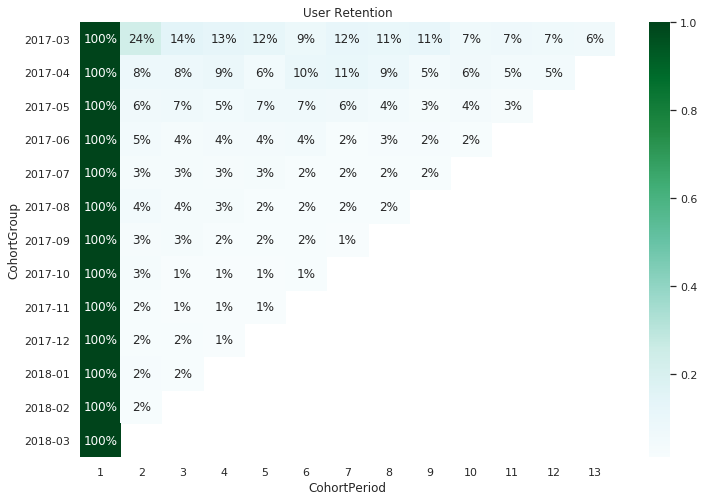

In [7]:
cohort_retention_analysis.cohort_draw(a)

In [8]:
class cohort_revenue_analysis:
    def cohort(df, col_date, col_id):
        # Get year and month from col_date column and Create ConvPeriod column
        df['ConvPeriod'] = df[col_date].map(lambda x: 100*x.year + x.month)
        # setting index
        df.set_index(col_id, inplace=True)
        # Groupby col_id, apply min col_date to get year and month from earliest date and Create CohortGroup column
        df['CohortGroup'] = df.groupby(level=0)[col_date].min().apply(lambda x: x.strftime('%Y-%m'))
        # resetting index
        df.reset_index(inplace=True)
        # dropping null values
        df.dropna()
        # groupby multiindex and aggregate the unique col_ids per CohortGroup and ConvPeriod
        cohorts = df.groupby(['CohortGroup', 'ConvPeriod']).agg({col_id: np.sum})
        # apply cohort_period() on cohorts based level 0(CohortGroup and ConvPeriod)
        cohorts = cohorts.groupby(level=0).apply(cohort_revenue_analysis.cohort_period)
        # resetting index
        cohorts.reset_index(inplace=True)
        # setting index
        cohorts.set_index(['CohortGroup','CohortPeriod'], inplace=True)
        # create a Series holding the total size of each CohortGroup
        cohort_group_size = cohorts[col_id].groupby(level=0).first()
        # Unstack cohort and normalize
        user_retention = cohorts[col_id].unstack(0).divide(cohort_group_size, axis=1)
        return user_retention
    def cohort_period(df):
        '''
        Creates a `CohortPeriod` column per CohortGroup
        '''
        df['CohortPeriod'] = np.arange(len(df)) + 1
        return df
    def cohort_draw(df):
        sns.set(style='white')
        plt.figure(figsize=(12, 8))
        plt.title('Revenue Retention')
        sns.heatmap(df.T, annot=True, fmt='.0%',cmap = 'BuGn')
        plt.show()


In [9]:
b = cohort_revenue_analysis.cohort(df_A, 'Conv_Date', 'Revenue')
b.head(20)

CohortGroup,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.117285,0.049163,0.169401,0.173448,0.061016,0.113110,0.114289,0.105314,0.045227,0.063567,0.040875,0.035188,NaN
3,0.006714,0.046927,0.175629,0.083987,0.135662,0.098870,0.136028,0.064005,0.062351,0.058629,0.049361,NaN,NaN
4,0.006558,0.042500,0.146991,0.144533,0.133206,0.084796,0.066954,0.066549,0.054207,0.038089,NaN,NaN,NaN
5,0.008760,0.029436,0.185155,0.158113,0.190572,0.069454,0.073383,0.070021,0.065096,NaN,NaN,NaN,NaN
6,0.005209,0.051287,0.205065,0.174412,0.092855,0.064326,0.071924,0.066141,NaN,NaN,NaN,NaN,NaN
7,0.007704,0.055319,0.228296,0.119911,0.123684,0.091720,0.083369,NaN,NaN,NaN,NaN,NaN,NaN
8,0.007669,0.068531,0.141081,0.181815,0.091429,0.096482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.014569,0.040028,0.180113,0.115231,0.117503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


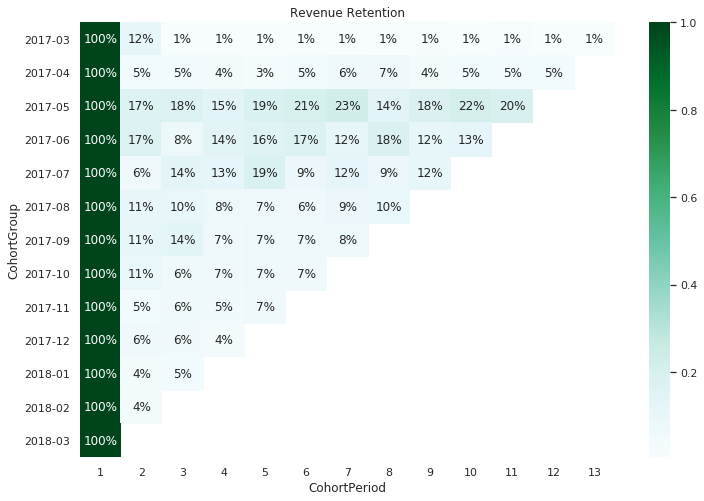

In [10]:
cohort_revenue_analysis.cohort_draw(b)